In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\mj\anaconda3\envs\python_seaborn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=="United States")].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [8]:
df_DA_US = df_DA_US.explode('job_skills')


df_DA_US[['salary_year_avg', 'job_skills']].head(15)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
180,90250.0,powerpoint
410,133285.0,sql
410,133285.0,word
410,133285.0,excel
410,133285.0,visio


In [13]:
#top paying skills
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'median', ascending=False)

In [15]:
df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [19]:
#top popular/count of skills
df_DA_top_skills= df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by = 'count', ascending=False)
df_DA_top_skills = df_DA_top_skills.head(10)

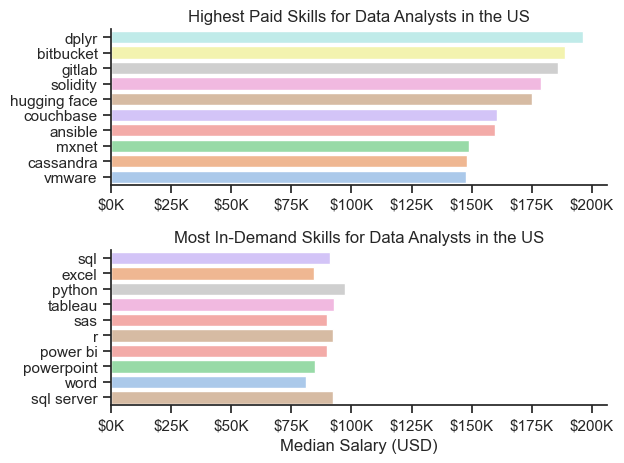

In [24]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='pastel')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, hue='median', ax=ax[1], palette='pastel')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='white')
sns.despine()
plt.tight_layout()
plt.show()